# Final Project Assignment 

#### Due Sunday 2/23 at 11:59pm

### This code was transferred to the python script percentages-per-race.py

##### This is a modification of week-six analysis and week-four preliminary anaysis; received guidance from Wing Hui on week-six assignment. modified code with guidance from Mark Geha. 

## Importing my csv file and the necessary libraries

In [2]:
import pandas
# need pandas to import dataset
import numpy
# need numpy for numerical analysis
import matplotlib.pyplot as plt
# need matplotlib.pyplot to plot data; visual representation of data
import csv
# need csv for file reading and writing

def np_from_csv(csv_file):
    temp_data = pandas.read_csv(csv_file, header = None)
    data = temp_data.to_numpy()
    return data
# this function imports a csv file as pandas and change it to a numpy array
# 'header = None': https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

In [34]:
data = np_from_csv('food_access_data.csv')
# imported my food access csv file as pandas, converted it to numpy, and saved it as data

## Assigning headers to the columns in the dataset

In [76]:
# variable name = column # corresponding to the variable in the dataset

# Total population counts per race
white_total = 43
black_total = 44 
asian_total = 45
islander_total = 46
native_total = 47
other_total = 48
latino_total = 49

# Population count living 1/2 mile beyond a supermarket per race
white_half = 8
black_half = 9
asian_half = 10
islander_half = 11
native_half = 12
other_half = 13
latino_half = 14

# Population count living 1 mile beyond a supermarket per race
white_1 = 17
black_1 = 18
asian_1 = 19
islander_1 = 20
native_1 = 21
other_1 = 22
latino_1 = 23

# Population count living 10 miles beyond a supermarket per race
white_10 = 26
black_10 = 27
asian_10 = 28
islander_10 = 29
native_10 = 30
other_10 = 31
latino_10 = 32

# Population count living 20 miles beyond a supermarket per race
white_20 = 35
black_20 = 36
asian_20 = 37
islander_20 = 38
native_20 = 39
other_20 = 40
latino_20 = 41

## Analysis Function: Percent Population at Distance from Supermarket per Race

Since the ultimate goal is to compare food access between racial groups in the United States, the following functions will calculate the percentage of individuals of a defined race living a certain distance away from a supermarket.

In [77]:
# MODIFICATIONS: 
# in the past assignment, each distance for the supermarket (1/2, 1, 10, 20) had its own function
# the function below consolidates the functions into one
# the defined fuction also rounds the calculated percentage and sets a default value of 2 decimal places

def percent_race_at_distance(input_data, race_distance, race_total, dec = 2):
    race_distance_sum = numpy.sum(input_data[:, race_distance])
    race_total_sum = numpy.sum(input_data[:, race_total])
    # 'numpy.sum' is a functionality that adds up all values in the specified column
    # inside the parentheses, the format is: dataset_imported[rows, columns]
    # I want all rows ':' and the column corresponding to the variable specified in the first line of the function
    percentage = race_distance_sum/race_total_sum * 100
    return round(percentage, dec)
    # 'round' will round the final value

In [78]:
percent_white_half = percent_race_at_distance(data, white_half, white_total, 1)
print(percent_white_half, '% of the white population lives beyond 1/2 mile of the supermarket')

74.1 % of the white population lives beyond 1/2 mile of the supermarket


## Visualization Function: Percentage of Race Living at Distance from Supermarket VS Distance from Supermarket

In [95]:
# the function takes input of the race name and the percentages of the race at 4 distances
# these inputs correspond to the percentage function

def plot_race_percentage_vs_distance(race, perc):
    [half,one,ten,twenty] = perc
    # the line above will be used eventually in a for loop that takes percentage outputs per race
    plt.plot([0.5, 1, 10, 20],[half, one, ten, twenty])
    # plots distance values vs percentages 
    plt.axis([0, 20, 0, 100])
    # sets x-axis (0, 20) and y-axis (1, 100)
    plt.xlabel('Distance from Supermarket (Miles)')
    # labels the x-axis
    plt.ylabel('Percentage')
    # labels the y-axis
    plt.title('Percentage of', race, 'Population Living at a Distance from a Supermarket')
    # sets axis title
    # '%s' ... '% race' was used in the week six assignment as suggested by Wing Hui, but this is the format that 
    # we typically use in class
    # either way, there are multiple ways to do this! %s imports the string
    return

## Making the Analysis and Visualization Functions More Robust

As of right now, I would have to manually run the defined function for each of the seven racial categories and each of the four distances per race. The modified function below streamlines this process. Received help from Mark Geha.

In [118]:
total = [white_total, black_total, asian_total, islander_total, native_total, other_total, latino_total]
# earlier in the code, I defined each of the variables in this list
# these totals will eventually be pulled by the function

distance = [[white_half, white_1, white_10, white_20], 
            [black_half, black_1, black_10, black_20], 
            [asian_half, asian_1, asian_10, asian_20], 
            [islander_half, islander_1, islander_10, islander_20], 
            [native_half, native_1, native_10, native_20], 
            [other_half, other_1, other_10, other_20], 
            [latino_half, latino_1, latino_10, latino_20]]
# these variables were also defined earlier in the code (each is a column in the dataset)
# since there are four distances per race for a total of seven racial categories, I made an 7x4 2D array 

name = ['White', 'Black', 'Asian', 'Islander', 'Native', 'Other', 'Latino']
# list of the racial group categories

num_races = len(total)
# the number of races in the data set, which equals the length of the list 'total' 

num_dist = 4
# there are four distances

perc = numpy.zeros((num_races,num_dist))
# this is very similar to when we open an empty list before a for loop to add (append) stuff later
# BUT it will create an empty 7x4 2D array because it has an array with 4 distance entries for each of the 7 races
# learned this from Mark Geha; https://www.geeksforgeeks.org/numpy-zeros-python/

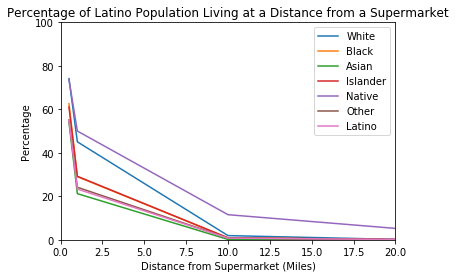

In [127]:
for race in range(num_races):
# this line says that the following for loop will run 7 times 
# because there are 7 races and it will run once per race
    for dist in range(num_dist):
    # within the for loop (i.e. for each race), the next set of code will run 4 times
    # because it will run for each of the 4 distances per race
        perc[race][dist] = percent_race_at_distance(data, distance[race][dist], total[race], 2)
        # this will add items to the empty 2D array 
        # the items will correspond to the output of the function that was defined to calculate percentages
        # USE BRACKETS BECAUSE WERE ARE PULLING FROM AND ADDING TO ARRAYS
    plot_race_percentage_vs_distance(name[race], perc[race])
    # this will now take the new array made from the output of the percentage function
    # and put it into the plotting function defined earlier
    # it will pull a race from the list 'name'
    # and pull an array of percents per race --> it will run each percentage at a time
    # RECALL [half,one,ten,twenty] = perc

plt.legend(name)
# the next line of code will overlay the plots, so we need a legend 
# the legent pulls the names from the list 'name', which has the racial categories
plt.show()
# taking the plt.show line of code outside of the loop will no longer show the plots one by one
# instead it will overlay them to allow for clear comparison between groups!!! :) 

## Reading a File

In [116]:
# the open function opens the data csv 
# the csv.DictReader gets an ordered dictionary
# we iterate our dictionary to find how many occurrences we have of a given key having values assigned

with open('food_access_data.csv', mode = 'r', encoding = 'utf-8-sig') as csvfile:
    reader = csv.DictReader(csvfile)
    occurences = 0
    for row in reader:
        occurences = occurences + 1
    print('we have {} occurences of values to a key.\n'.format(occurences))
    # {} takes the output corresponding to the number of occurences
    # \n adds a blank line to the code
    # MODIFICATION: cleaned up the statements  
        
# DictReader makes an ordered dictionary and adds up the values for a given key
# this will give us the total polled population of a race
# MODIFICATION: I did not have headings for the data in the week six assignment
# BUT now, I have named all columns

with open('food_access_data.csv', mode = 'r', encoding = 'utf-8-sig') as csvfile:
    reader = csv.DictReader(csvfile)
    total_white = 1622
    for row in reader:
        total_white = total_white + int(row['1622'])
    print('The total white population in my data according to DictReader is {}.\n'.format(total_white))
    
# comparison of my results from DictReader numpy's sum function

print("The total white population in my data according to np.sum is {:0.0f}.\n".format(numpy.sum(data[:, 43])))

we have 72863 occurences of values to a key.

The total white population in my data according to DictReader is 223553265.

The total white population in my data according to np.sum is 223553265.



## Writing a File

In [ ]:
# declare a variable output_file and open a file with read and write capabilites

output_file = open('final-project.txt','w+')

# now we write to the file the data that we got from extraction and analysis functions and from DictReader
# format the written content using the format() function

# the use of {} in the below line signals the place where the data from format() goes
# in our case we are filling {} with the total number of white people polled that we got from using DictReader

output_file.write('The total number of white people that are in my sample is {}.\n'.format(total_white))

# our use of {:0.2f} below is another, more detailed way of using the format() function
# the : tells format() that we will be specifing a format
# the 0 signals that we want to pad the number with a 0
# the .2 signals that we want 2 digits of precision past the decimal and to get rid of the rest
# the f signals that we want to display a fixed point number

output_file.write('The percentage of white people in my sample that live at least one half mile away from the supermarket is {:0.2f}%.\n'.format(white_half_percent))
output_file.write('The percentage of white people in my sample that live at least one mile away from the supermarket is {:0.2f}%.\n'.format(white_one_percent))
output_file.write('The percentage of white people in my sample that live at least ten miles away from the supermarket is {:0.2f}%.\n'.format(white_ten_percent))

# closing the file we wrote in

output_file.close()

In [120]:
output_file = open('final-project.txt','w+')

def write_percent_in_file(race, perc):
    [half,one,ten,twenty] = perc
    output_file.write('Percentages corresponding to', race, ':', perc)
    
for race in range(num_races):
    for dist in range(num_dist):
        perc[race][dist] = percent_race_at_distance(data, distance[race][dist], total[race], 2)
    write_percent_in_file(name[race], perc[race])
    
# I tried ¯\_(ツ)_/¯

TypeError: write() takes exactly one argument (4 given)

In [126]:
for race in range(num_races):
    for dist in range(num_dist):
        perc[race][dist] = percent_race_at_distance(data, distance[race][dist], total[race], 2)
print(perc[1,0])
#    output_file.write()

62.6


## Assert Condition

Assertion statements can be used to spot check your code. You can calculate the value that a function is supposed to calculate and assert that the value calculated by the function/saved to a variable will equal this value. If the statement is correct (which it should be) there will be no error. If this statement is not correct, you will get an error message, meaning that your code is not calculating the value correctly (or something else is wrong with your code). 

This can be used for all lines of the function/code so that you know exactly where the code went wrong and you can debug it. I would start from the bottom up... if the final statement is correct, then the beginning portion of you code is likely correct too.

https://www.programiz.com/python-programming/assert-statement

In [101]:
print(perc[0,0])

74.12


In [103]:
assert perc[0,0] == 50
# this looks at the first entry of the array 'perc' which corresponds to percentage of white ppl 1/2 mile dist
# the assertion error indicates that the statement that this entry = 50% is not correct
# this makes sense because the value is actually 74%

AssertionError: 

In [104]:
assert perc[0,0] > 70
# this did not give me an error, which means that the statement is true
# this is correct given that 74 > 70
# since this val corresponds to my final calculation and it is correct, I know the beggining of my code is correct

In [105]:
assert perc[0,0] < 70, "this value is incorrect"
# the assertion error now says "this value is incorrect" because I specified a message

AssertionError: this value is incorrect

In [106]:
assert perc[0,0] > 70, "this value is incorrect"
# IF this had been a false statement, which is not, it would have said the message I specified
# everything is fine, so the code will continue

In [25]:
import csv
import re

counties = []

with open ("complete_data.txt", "r") as dset:
    data2 = csv.DictReader(dset, delimiter = "\t")
    for row in data2:
        counties.append(row['county'])
        # to extract this column and append it to a new list

In [26]:
county_regex = re.compile(r'\w+')

re.findall(county_regex, str(counties))

['Autauga',
 'Autauga',
 'Autauga',
 'Autauga',
 'Autauga',
 'Autauga',
 'Autauga',
 'Autauga',
 'Autauga',
 'Autauga',
 'Autauga',
 'Autauga',
 'Baldwin',
 'Baldwin',
 'Baldwin',
 'Baldwin',
 'Baldwin',
 'Baldwin',
 'Baldwin',
 'Baldwin',
 'Baldwin',
 'Baldwin',
 'Baldwin',
 'Baldwin',
 'Baldwin',
 'Baldwin',
 'Baldwin',
 'Baldwin',
 'Baldwin',
 'Baldwin',
 'Baldwin',
 'Baldwin',
 'Baldwin',
 'Baldwin',
 'Baldwin',
 'Baldwin',
 'Baldwin',
 'Baldwin',
 'Baldwin',
 'Baldwin',
 'Baldwin',
 'Baldwin',
 'Baldwin',
 'Barbour',
 'Barbour',
 'Barbour',
 'Barbour',
 'Barbour',
 'Barbour',
 'Barbour',
 'Barbour',
 'Barbour',
 'Bibb',
 'Bibb',
 'Bibb',
 'Bibb',
 'Blount',
 'Blount',
 'Blount',
 'Blount',
 'Blount',
 'Blount',
 'Blount',
 'Blount',
 'Blount',
 'Bullock',
 'Bullock',
 'Bullock',
 'Butler',
 'Butler',
 'Butler',
 'Butler',
 'Butler',
 'Butler',
 'Butler',
 'Butler',
 'Butler',
 'Calhoun',
 'Calhoun',
 'Calhoun',
 'Calhoun',
 'Calhoun',
 'Calhoun',
 'Calhoun',
 'Calhoun',
 'Calhoun'

In [27]:
from collections import defaultdict

county_dict = defaultdict(int)

for county in counties:
    county_dict[county] += 1

In [28]:
county_dict

defaultdict(int,
            {'Autauga': 12,
             'Baldwin': 40,
             'Barbour': 13,
             'Bibb': 48,
             'Blount': 37,
             'Bullock': 3,
             'Butler': 169,
             'Calhoun': 99,
             'Chambers': 15,
             'Cherokee': 83,
             'Chilton': 9,
             'Choctaw': 12,
             'Clarke': 49,
             'Clay': 140,
             'Cleburne': 11,
             'Coffee': 35,
             'Colbert': 14,
             'Conecuh': 5,
             'Coosa': 3,
             'Covington': 20,
             'Crenshaw': 6,
             'Cullman': 18,
             'Dale': 14,
             'Dallas': 565,
             'DeKalb': 195,
             'Elmore': 20,
             'Escambia': 80,
             'Etowah': 30,
             'Fayette': 201,
             'Franklin': 495,
             'Geneva': 6,
             'Greene': 182,
             'Hale': 15,
             'Henry': 103,
             'Houston': 60,
             'Jacks